# GARCH Stock Forecasting

## Read Data

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [4]:
def compute_return(y, r_type="log", h=1):
    
    # exclude first h observations
    y2 = y[h:]
    
    # exclude last h observations
    y1 = y[:-h]
    
    if r_type == "log":
        ret = np.concatenate(([np.nan]*h, 100 * (np.log(y2) - np.log(y1))))
    else:
        ret = np.concatenate(([np.nan]*h, 100 * (y2-y1)/y1))
        
    return ret

## DIS Volatility

In [6]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

disney = yf.Ticker("DIS")
hist = disney.history(period="max", start=start, end=end)

for i in range(5):
    hist["ret"+str(i+1)] = compute_return(hist["Close"].values, h=i+1)


In [8]:
hist.head(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ret1,ret2,ret3,ret4,ret5
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,88.457406,88.802246,86.537453,87.376266,5865400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00-05:00,86.938202,87.003442,85.540182,86.099388,7789400,0.0,0.0,-1.472139,NaN,NaN,NaN,NaN
2015-01-06 00:00:00-05:00,86.276485,86.854336,84.962350,85.642715,6793100,0.0,0.0,-0.531813,-2.003952,NaN,NaN,NaN
2015-01-07 00:00:00-05:00,86.416292,86.817058,85.838441,86.518814,6589500,0.0,0.0,1.017772,0.485959,-0.986180,NaN,NaN
2015-01-08 00:00:00-05:00,87.488099,87.888865,87.199170,87.413536,7579400,0.0,0.0,1.028825,2.046597,1.514784,0.042645,NaN
2015-01-09 00:00:00-05:00,87.655862,88.792913,87.599937,87.842262,8621300,0.0,0.0,0.489259,1.518084,2.535856,2.004043,0.531904


In [10]:
returns = 100 * hist.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

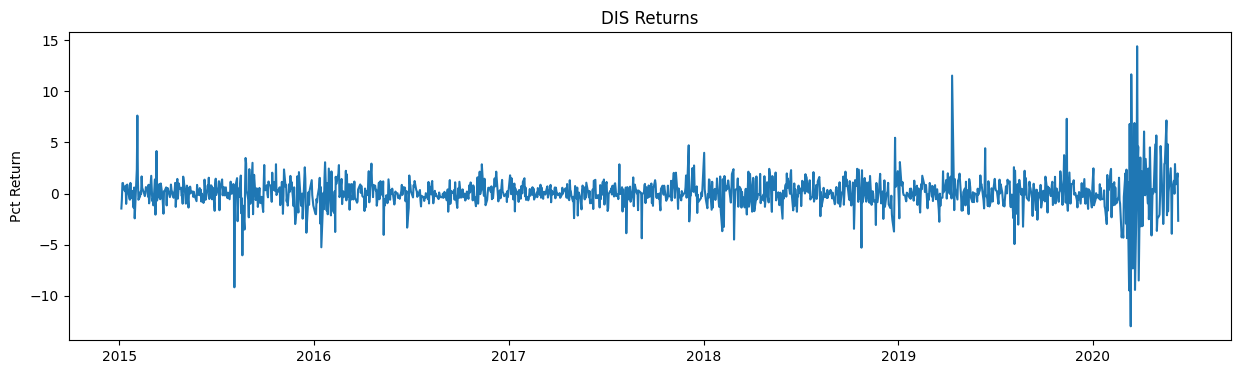

In [13]:
plt.figure(figsize=(15,4))
plt.plot(returns)
plt.ylabel('Pct Return')
plt.title('DIS Returns')

## PACF

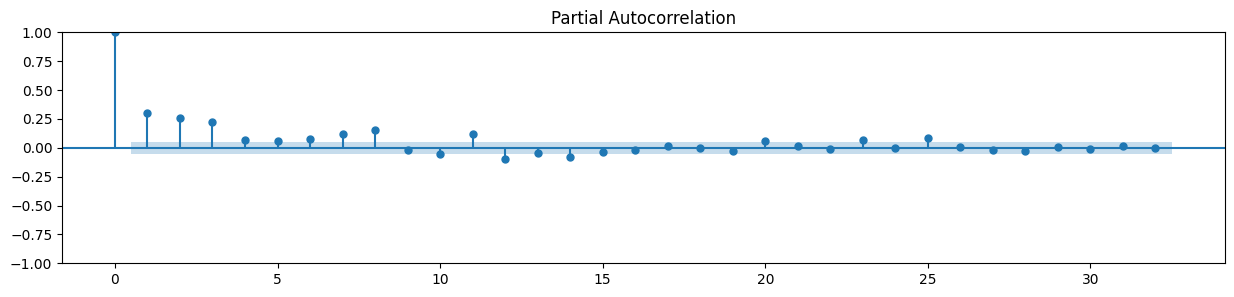

In [29]:
fig, ax = plt.subplots(figsize=(15, 3))
plot_pacf(returns**2, ax=ax)
plt.show()

## Fit GARCH(3,3)

In [32]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 228988056271.12057
Iteration:      2,   Func. Count:     22,   Neg. LLF: 972122001.7743535
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.937336527403
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.3631463501215
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2320.0252787609306
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2338.2803748483593
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2357.8860897533514
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2398.1732586551334
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2296.4525241673387
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2296.443677162152
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2296.3425454978074
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2296.3243874999416
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2296.3075951476585
Iteration:     14,   Func. Count:    139,   Neg. LLF: 

In [33]:
model_fit.summary()

c:\Users\ytl_c\miniconda3\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\ytl_c\miniconda3\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\ytl_c\miniconda3\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2296.30
Distribution:                  Normal   AIC:                           4608.61
Method:            Maximum Likelihood   BIC:                           4650.37
                                        No. Observations:                 1367
Date:                Sat, Dec 02 2023   Df Residuals:                     1366
Time:                        22:28:54   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5565e-03  4.300e-02 -5.945e-02      0.953 [-8.683e-02,8.172e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5478      0.189      2.895  3.789e-03    [  0.177,  0.919]
alpha[1]       0.0681  3.919e-02      1.738  8.226e-02 [-8.712e-03,  0.145]
alpha[2]       0.2036  9.664e-02      2.107  3.509e-02  [1.424e-02,  0.393]
alpha[3]       0.3208      0.151      2.118  3.419e-02  [2.392e-02,  0.618]
beta[1]        0.0000      0.151      0.000      1.000    [ -0.295,  0.295]
beta[2]    8.5125e-15  9.815e-02  8.673e-14      1.000    [ -0.192,  0.192]
beta[3]        0.2242      0.153      1.464      0.143 [-7.597e-02,  0.524]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [34]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3333.3593570993567
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6660.048151631494
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1250363.9844258176
Iteration:      4,   Func. Count:     31,   Neg. LLF: 190395.9918685694
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7937.784868047549
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2543.280275287425
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2455.4084693409604
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2312.3837818547927
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2311.8749932059145
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2311.200737599154
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2311.1890420258223
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2311.188047752362
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2311.187902464455
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2311

In [35]:
model_fit.summary()

c:\Users\ytl_c\miniconda3\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\ytl_c\miniconda3\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\ytl_c\miniconda3\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2311.19
Distribution:                  Normal   AIC:                           4632.38
Method:            Maximum Likelihood   BIC:                           4658.48
                                        No. Observations:                 1367
Date:                Sat, Dec 02 2023   Df Residuals:                     1366
Time:                        22:29:23   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.002e-02      0.357      0.721 [-6.414e-02,9.271e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8612      0.138      6.222  4.902e-10    [  0.590,  1.132]
alpha[1]       0.0869  4.455e-02      1.950  5.121e-02 [-4.566e-04,  0.174]
alpha[2]       0.2620  9.097e-02      2.880  3.981e-03  [8.366e-02,  0.440]
alpha[3]       0.3583      0.169      2.125  3.361e-02  [2.778e-02,  0.689]
===========================================================================

Covariance estimator: robust
"""

In [36]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [ ]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [ ]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [ ]:
returns = 100 * spy.Close.pct_change().dropna()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

In [ ]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [ ]:
model = arch_model(returns, p=2, q=2)

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

## Rolling Forecast

In [ ]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [ ]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)